In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import (VotingClassifier, BaggingClassifier, 
                              RandomForestClassifier, AdaBoostClassifier, 
                             GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             f1_score, roc_auc_score)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load dataset
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,result,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# 독립변수/종속변수 분리 및 확인
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [4]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: result, Length: 569, dtype: object

In [6]:
# y class 종류 확인
print(np.unique(y))

['B' 'M']


# Bagging classifier

In [7]:
?BaggingClassifier

## 주요 파라미터

### base_estimator: 기본 모형
### n_estimators: 모형 개수
### bootstrap: 데이터 중복 사용 여부
### max_samples: 데이터 샘플 중 사용할 개수 또는 비율
### bootstrap_features: 변수 중복 사용 여부
### max_features: 변수 중 사용할 개수 또는 비율
### oob_score

In [8]:
lr = LogisticRegression(max_iter=100)
lr.fit(X, y)

y_pred = lr.predict(X)

con_mat_lr = confusion_matrix(y, y_pred)
print(con_mat_lr)

[[342  15]
 [ 16 196]]


/home/pirl/anaconda3/envs/posco/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
bagging = BaggingClassifier(base_estimator=LogisticRegression(max_iter=100),
                                n_estimators=10, 
                                max_features=0.99, 
                                max_samples=0.99)
bagging.fit(X, y)

/home/pirl/anaconda3/envs/posco/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/pirl/anaconda3/envs/posco/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.99,
                  max_samples=0.99)

In [10]:
bagging

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.99,
                  max_samples=0.99)

In [11]:
y_pred = bagging.predict(X)

con_mat_bagging = confusion_matrix(y, y_pred)
print(con_mat_bagging)

[[345  12]
 [ 18 194]]


## Random Forest

In [12]:
?RandomForestClassifier

## 주요 파라미터

### n_estimators: 의사결정트리의 수
### max_features: default=sqrt(n_features)
### -
### criterion: {'gini', 'entropy'}
### max_depth
### min_samples_split
### min_samples_leaf

In [14]:
# hyperparameters: n_estimators, oob_score max_depth, min_samples_leaf, min_samples_split, 
random_forest = RandomForestClassifier(max_depth=4, 
                                       min_samples_split=0.01, 
                                       oob_score=True)
random_forest.fit(X, y)

RandomForestClassifier(max_depth=4, min_samples_split=0.01, oob_score=True)

In [56]:
# Estimators
# list of trees in random forest
random_forest.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=527733210),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=463484193),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=1131787998),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=1550514969),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=1978497699),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=846061521),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                        random_state=229794338),
 DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01

In [57]:
random_forest.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=0.01,
                       random_state=527733210)

In [15]:
feature_importance = random_forest.feature_importances_

In [18]:
feature_importance

array([0.05958046, 0.00967633, 0.06116142, 0.0633642 , 0.00354115,
       0.0147504 , 0.04434119, 0.14460413, 0.00174863, 0.00142119,
       0.00703511, 0.00211009, 0.01587306, 0.03726035, 0.00188421,
       0.00405477, 0.00392921, 0.00432833, 0.00259721, 0.00262149,
       0.09616215, 0.01533506, 0.13841467, 0.07748365, 0.01341482,
       0.01318556, 0.01974862, 0.12244633, 0.01084431, 0.00708191])

In [19]:
feature_name = X.columns.to_numpy()
feature_name

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [24]:
np.arange(100)[0:10:2]

array([0, 2, 4, 6, 8])

In [22]:
feature_importance[sorted_idx[::-1]]

array([0.14460413, 0.13841467, 0.12244633, 0.09616215, 0.07748365,
       0.0633642 , 0.06116142, 0.05958046, 0.04434119, 0.03726035,
       0.01974862, 0.01587306, 0.01533506, 0.0147504 , 0.01341482,
       0.01318556, 0.01084431, 0.00967633, 0.00708191, 0.00703511,
       0.00432833, 0.00405477, 0.00392921, 0.00354115, 0.00262149,
       0.00259721, 0.00211009, 0.00188421, 0.00174863, 0.00142119])

In [21]:
feature_name[sorted_idx]

array(['fractal_dimension_mean', 'symmetry_mean', 'smoothness_se',
       'texture_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_mean', 'concavity_se', 'compactness_se',
       'concave points_se', 'radius_se', 'fractal_dimension_worst',
       'texture_mean', 'symmetry_worst', 'compactness_worst',
       'smoothness_worst', 'compactness_mean', 'texture_worst',
       'perimeter_se', 'concavity_worst', 'area_se', 'concavity_mean',
       'radius_mean', 'perimeter_mean', 'area_mean', 'area_worst',
       'radius_worst', 'concave points_worst', 'perimeter_worst',
       'concave points_mean'], dtype=object)

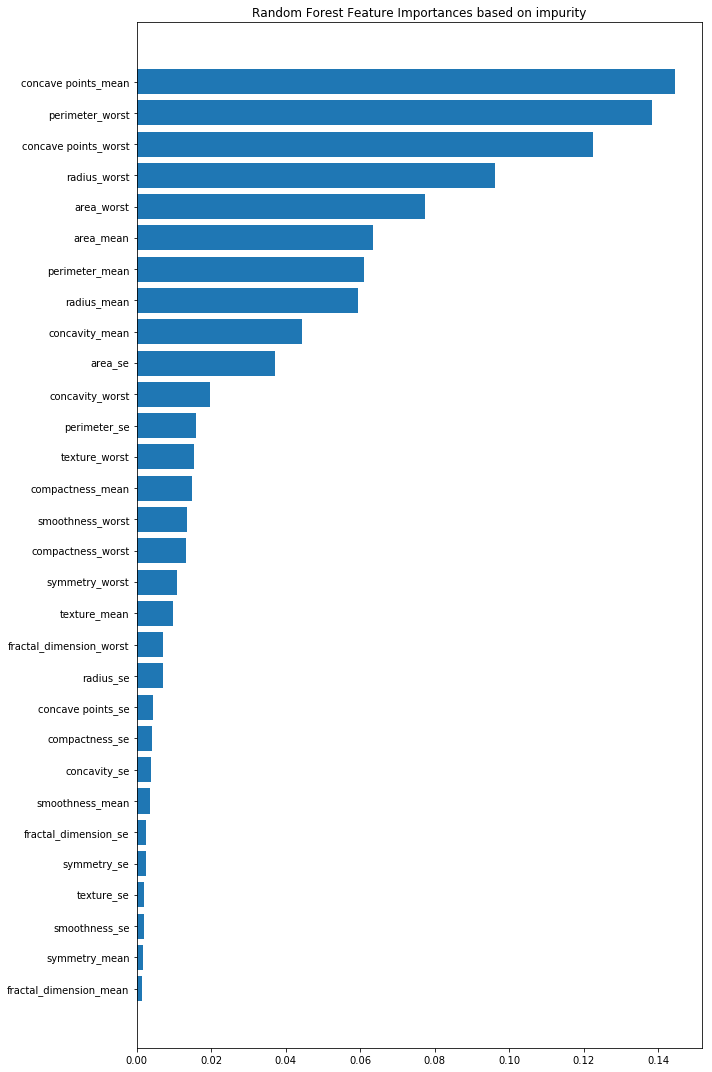

In [17]:
import matplotlib.pyplot as plt
sorted_idx = feature_importance.argsort()
y_ticks = np.arange(0, len(feature_name))
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(y_ticks, feature_importance[sorted_idx])
ax.set_yticklabels(feature_name[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances based on impurity")
fig.tight_layout()
plt.show()


In [25]:
# out of bag (OOB) score
random_forest.oob_score_

0.9578207381370826

In [26]:
y_pred = random_forest.predict(X)

con_mat_rf = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)
# f1 = f1_score(y, y_pred)
print(con_mat_rf)

[[356   1]
 [  7 205]]


In [ ]:
# ExtraTreesClassifier

## AdaBoost

In [33]:
?AdaBoostClassifier

## 주요 파라미터

### base_estimator
### n_estimators

In [28]:
adaboost = AdaBoostClassifier(n_estimators=20)
adaboost.fit(X, y)

AdaBoostClassifier(n_estimators=20)

In [29]:
# Esimators information
print(adaboost.estimator_weights_)
print(adaboost.estimator_errors_)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.07732865 0.11743357 0.17373872 0.26356926 0.21315326 0.30836757
 0.28119699 0.29502218 0.33516154 0.31113768 0.25637993 0.32538881
 0.31996723 0.30656901 0.27291279 0.29671097 0.27948102 0.325612
 0.31507775 0.38020668]


In [30]:
# list of trees in adabosst
adaboost.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=63329341),
 DecisionTreeClassifier(max_depth=1, random_state=1082392206),
 DecisionTreeClassifier(max_depth=1, random_state=967181313),
 DecisionTreeClassifier(max_depth=1, random_state=999236382),
 DecisionTreeClassifier(max_depth=1, random_state=675492003),
 DecisionTreeClassifier(max_depth=1, random_state=708766365),
 DecisionTreeClassifier(max_depth=1, random_state=14354088),
 DecisionTreeClassifier(max_depth=1, random_state=157546311),
 DecisionTreeClassifier(max_depth=1, random_state=1997469006),
 DecisionTreeClassifier(max_depth=1, random_state=1227815538),
 DecisionTreeClassifier(max_depth=1, random_state=512469864),
 DecisionTreeClassifier(max_depth=1, random_state=1608659423),
 DecisionTreeClassifier(max_depth=1, random_state=427818718),
 DecisionTreeClassifier(max_depth=1, random_state=1815224205),
 DecisionTreeClassifier(max_depth=1, random_state=718493839),
 DecisionTreeClassifier(max_depth=1, random_state=2087899219),
 Dec

In [31]:
adaboost.estimators_[1]

DecisionTreeClassifier(max_depth=1, random_state=1082392206)

In [32]:
# feature importance
feature_importance_ada = adaboost.feature_importances_
print(feature_importance_ada)

[0.   0.05 0.   0.   0.05 0.05 0.   0.1  0.   0.   0.   0.05 0.   0.15
 0.   0.05 0.   0.   0.   0.05 0.05 0.15 0.   0.05 0.   0.   0.05 0.1
 0.   0.05]


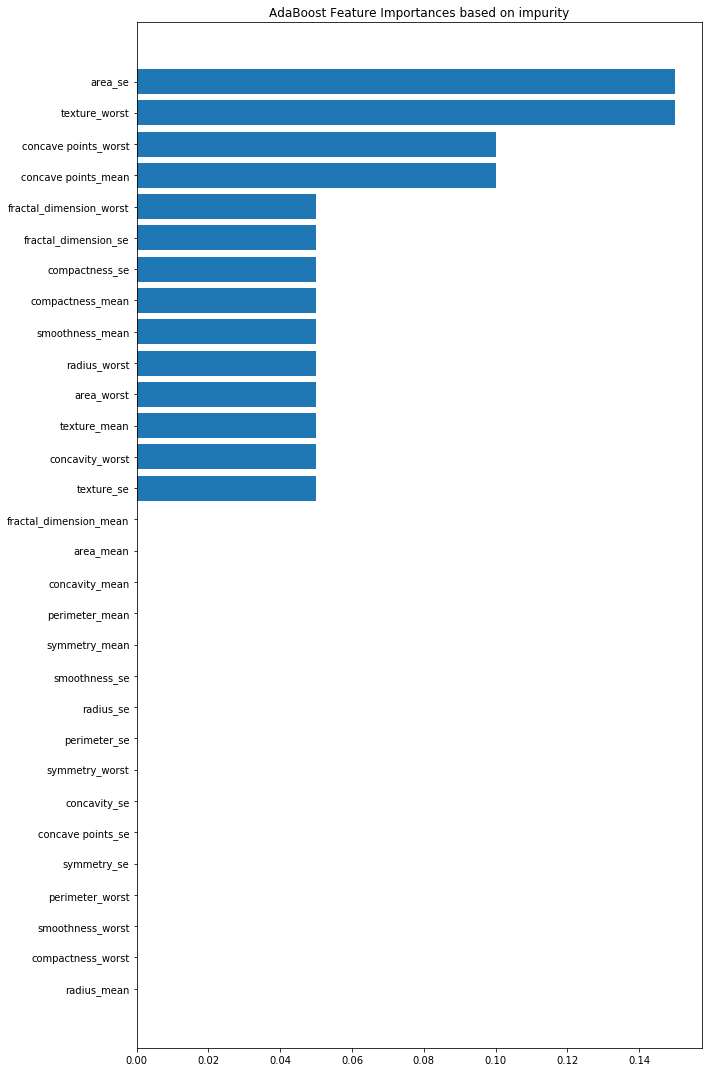

In [34]:
import matplotlib.pyplot as plt
sorted_idx = feature_importance_ada.argsort()
y_ticks = np.arange(0, len(feature_name))
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(y_ticks, feature_importance_ada[sorted_idx])
ax.set_yticklabels(feature_name[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("AdaBoost Feature Importances based on impurity")
fig.tight_layout()
# plt.tight_layout()
plt.show()


In [35]:
y_pred = adaboost.predict(X)

con_mat = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)
# f1 = f1_score(y, y_pred)
print(con_mat)

[[357   0]
 [  0 212]]


# GradientBoosting

In [36]:
?GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier()
gb.fit(X, y)

y_pred = gb.predict(X)

con_mat = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)
print(con_mat)

[[357   0]
 [  0 212]]


# Majority Voting

In [39]:
# 세 개의 다른 모형을 합쳐 다수결로 분류
# 3개 기본 모델 생성
model1 = LogisticRegression(max_iter=10000)  # 수렴을 위해 max_iter 입력
model2 = QuadraticDiscriminantAnalysis()
model3 = DecisionTreeClassifier()

# 3개 모형의 조합을 이용한 앙상블 분류기 생성
estimator_list = [('lr', model1), 
                 ('qda', model2), 
                 ('dt', model3)]
ensemble = VotingClassifier(estimators=estimator_list, 
                           voting='soft')

In [42]:
# for문에서 이름과 함께 출력하기 위해 아래 dictionary 선언
model_dict = {'LogisticRegression': model1, 
             'QuadraticDiscriminantAnalysis': model2, 
             'DecisionTree': model3, 
             'Voting': ensemble}

# 각 모형에 대해 Accuracy, AUC 출력
for model_name, model in model_dict.items():
    model.fit(X, y)
    
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)
    
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_prob[:, 1])
    
    print('='*40)
    print(model_name)
    print('Accuracy:', acc)
    print('AUC:', auc)

LogisticRegression
Accuracy: 0.9578207381370826
AUC: 0.9947016542466043
QuadraticDiscriminantAnalysis
Accuracy: 0.9736379613356766
AUC: 0.9953490830294383
DecisionTree
Accuracy: 1.0
AUC: 1.0
Voting
Accuracy: 0.984182776801406
AUC: 0.9996696791924318


In [43]:
model_dict.items()

dict_items([('LogisticRegression', LogisticRegression(max_iter=10000)), ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis()), ('DecisionTree', DecisionTreeClassifier()), ('Voting', VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('qda', QuadraticDiscriminantAnalysis()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft'))])

In [44]:
# 각 모형에 대해 5-fold CV의 Accuracy, AUC 출력
from sklearn.model_selection import KFold, cross_validate
seed = np.random.choice(1000)
print('Seed:', seed)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
for model_name, model in model_dict.items():
    scores = cross_validate(model, X, y, 
                            scoring='accuracy', 
                            return_train_score=True, 
                            cv=kf)
    print('='*30)
    print(model_name)
    print(scores['train_score'])
    print(scores['test_score'])

Seed: 818
LogisticRegression
[0.95604396 0.97802198 0.94945055 0.96483516 0.95614035]
[0.96491228 0.92105263 0.98245614 0.93859649 0.96460177]
QuadraticDiscriminantAnalysis
[0.97142857 0.97802198 0.97802198 0.97582418 0.97368421]
[0.95614035 0.92105263 0.97368421 0.98245614 0.9380531 ]
DecisionTree
[1. 1. 1. 1. 1.]
[0.9122807  0.88596491 0.89473684 0.94736842 0.94690265]
Voting
[0.98681319 0.99120879 0.98901099 0.99120879 0.98903509]
[0.97368421 0.92105263 0.97368421 0.98245614 0.95575221]


In [45]:
scores

{'fit_time': array([0.98435688, 0.77625132, 0.83518839, 0.9226234 , 1.04521275]),
 'score_time': array([0.00722098, 0.00936103, 0.00798821, 0.00796509, 0.00799274]),
 'test_score': array([0.97368421, 0.92105263, 0.97368421, 0.98245614, 0.95575221]),
 'train_score': array([0.98681319, 0.99120879, 0.98901099, 0.99120879, 0.98903509])}

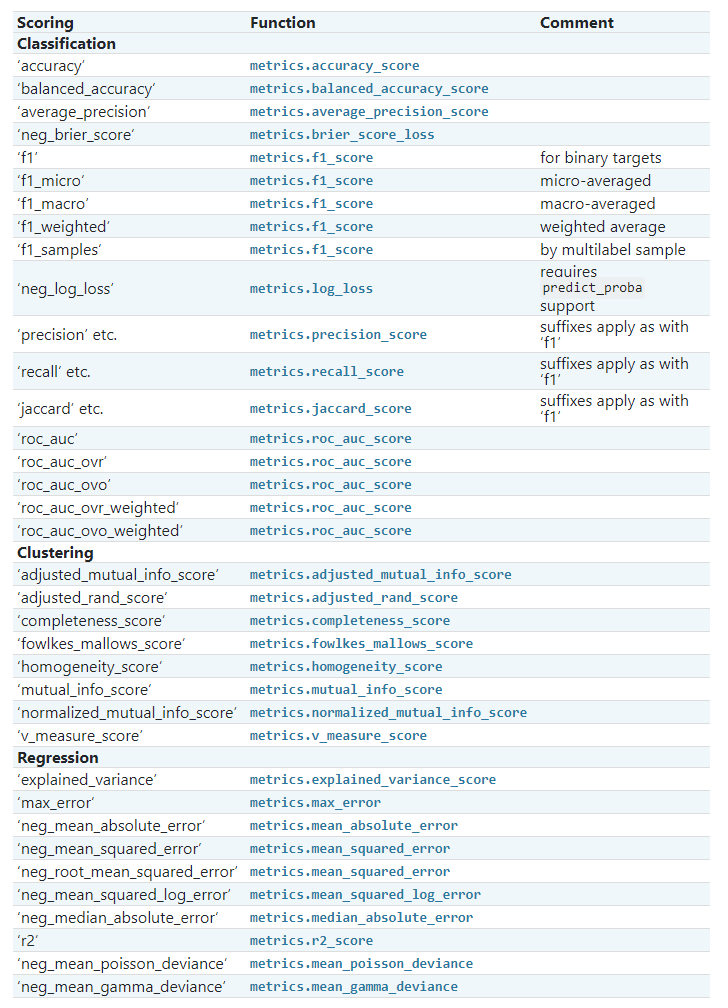

# 실습

## AdaBoost, RandomForest 비교

## 5-Fold cross validation (cross_validate 사용)

## X, y에 대해 5-fold train, test 평균 accuracy 계산

In [48]:
seed = np.random.choice(1000)
print('Seed:', seed)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)

adaboost = AdaBoostClassifier()
random_forest = RandomForestClassifier()

scores_ada = cross_validate(adaboost, X, y,
                       scoring='accuracy', 
                       cv=kf, 
                       return_train_score=True)

scores_rf = cross_validate(random_forest, X, y, 
                          scoring='accuracy', 
                          cv=kf, 
                          return_train_score=True)

Seed: 255


In [49]:
scores_ada

{'fit_time': array([0.1409831 , 0.13903975, 0.13736057, 0.1373105 , 0.13747263]),
 'score_time': array([0.00812292, 0.00795126, 0.00798416, 0.00807691, 0.00787687]),
 'test_score': array([0.98245614, 0.97368421, 0.95614035, 0.92982456, 0.96460177]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [50]:
print('Adaboost Train Acc:', np.mean(scores_ada['train_score']))
print('Adaboost Test Acc:', np.mean(scores_ada['test_score']))

print('RandomForest Train Acc:', np.mean(scores_rf['train_score']))
print('RandomForest Test Acc:', np.mean(scores_rf['test_score']))

Adaboost Train Acc: 1.0
Adaboost Test Acc: 0.9613414066138798
RandomForest Train Acc: 0.9995604395604396
RandomForest Test Acc: 0.9596180717279925


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_new = le.fit_transform(y)
print(le.classes_)

['B' 'M']


In [55]:
le.inverse_transform(y_new)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [56]:
seed = np.random.choice(1000)
print('Seed:', seed)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)

adaboost = AdaBoostClassifier()

scores_ada = cross_validate(adaboost, X, y_new,
                       scoring=['accuracy', 'recall', 'precision'], 
                       cv=kf, 
                       return_train_score=True)
scores_ada

Seed: 41


{'fit_time': array([0.1280725 , 0.1253531 , 0.12514257, 0.12501073, 0.12473726]),
 'score_time': array([0.0091145 , 0.00890923, 0.00895524, 0.00896835, 0.00890183]),
 'test_accuracy': array([0.99122807, 0.95614035, 0.97368421, 0.92105263, 0.99115044]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_recall': array([1.        , 0.90384615, 0.91891892, 0.86046512, 1.        ]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.97560976, 1.        , 1.        , 0.925     , 0.97560976]),
 'train_precision': array([1., 1., 1., 1., 1.])}